# Best accuracy yet is 88.95%

### Mini kaggle competition

 

Use the techniques we learned in W2 and W3, build and train a deep network for the fashion MNIST classification for the best accuracy. The goal is to get the best accuracy on the test data set.

We will use the same dataset from keras. 

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Grading policy

Please take this homework as a mini kaggle competition. In your submission you will show your effort of trying different approachs to improve your model. Based on your best accuracy, the upper 50% homework will get 10 points. The lower 50% will get 9 points. 

Please submit the homework in both Jupyter and HTML format. Please include your best accuracy on the top of your notebook.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#grid search
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pprint
pp = pprint.PrettyPrinter(indent = 4)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

#Normalize the dataset
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

In [3]:
x_train.shape

(55000, 28, 28)

# -------------------------------------------------------------------------------------------

In [5]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="selu", kernel_initializer='he_normal'),
    Dense(100, activation="selu", kernel_initializer='he_normal'),
    Dense(100, activation="selu", kernel_initializer='he_normal'),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])

2022-02-12 04:43:54.280253: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8052 - accuracy: 0.7237 - val_loss: 0.5756 - val_accuracy: 0.8008
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5439 - accuracy: 0.8084 - val_loss: 0.5039 - val_accuracy: 0.8254
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4922 - accuracy: 0.8260 - val_loss: 0.4717 - val_accuracy: 0.8344
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4649 - accuracy: 0.8351 - val_loss: 0.4503 - val_accuracy: 0.8440
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4467 - accuracy: 0.8422 - val_loss: 0.4371 - val_accuracy: 0.8500
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4321 - accuracy: 0.8471 - val_loss: 0.4346 - val_accuracy: 0.8502
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4216 - accuracy: 0.8515 - val_loss: 0.4201 - val_accuracy:

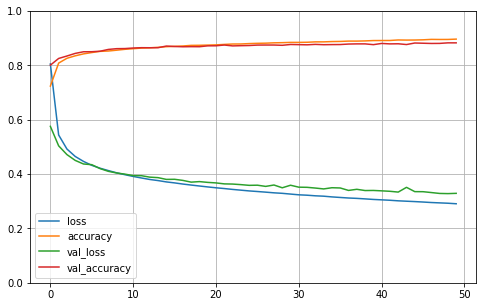

In [13]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8714


In [15]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.35893145203590393
Test accuracy: 0.871399998664856


# -------------------------------------------------------------------------------------------

In [17]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="selu", kernel_initializer='he_normal'),
    Dense(100, activation="selu", kernel_initializer='he_normal'),
    Dense(100, activation="selu", kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/50
430/430 - 3s - loss: 0.8375 - accuracy: 0.7184 - val_loss: 0.5006 - val_accuracy: 0.8298 - 3s/epoch - 7ms/step
Epoch 2/50
430/430 - 2s - loss: 0.5689 - accuracy: 0.8012 - val_loss: 0.4484 - val_accuracy: 0.8406 - 2s/epoch - 5ms/step
Epoch 3/50
430/430 - 2s - loss: 0.5181 - accuracy: 0.8197 - val_loss: 0.4283 - val_accuracy: 0.8528 - 2s/epoch - 5ms/step
Epoch 4/50
430/430 - 2s - loss: 0.4869 - accuracy: 0.8316 - val_loss: 0.4181 - val_accuracy: 0.8532 - 2s/epoch - 5ms/step
Epoch 5/50
430/430 - 2s - loss: 0.4669 - accuracy: 0.8369 - val_loss: 0.4092 - val_accuracy: 0.8592 - 2s/epoch - 4ms/step
Epoch 6/50
430/430 - 2s - loss: 0.4509 - accuracy: 0.8421 - val_loss: 0.3952 - val_accuracy: 0.8630 - 2s/epoch - 4ms/step
Epoch 7/50
430/430 - 2s - loss: 0.4403 - accuracy: 0.8465 - val_loss: 0.3957 - val_accuracy: 0.8630 - 2s/epoch - 5ms/step
Epoch 8/50
430/430 - 2s - loss: 0.4269 - accuracy: 0.8504 - val_loss: 0.3844 - val_accuracy: 0.8646 - 2s/epoch - 4ms/step
Epoch 9/50
430/430 - 2s 

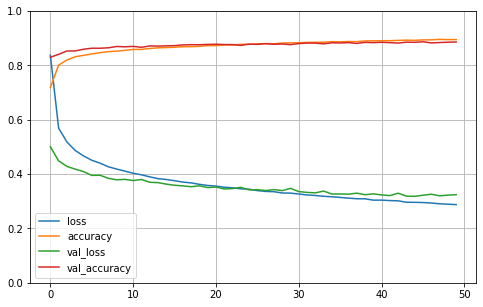

In [18]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8745
Test loss: 0.35833531618118286
Test accuracy: 0.8744999766349792


# -------------------------------------------------------------------------------------------

In [20]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/50
430/430 - 14s - loss: 1.8915 - accuracy: 0.6530 - val_loss: 0.8041 - val_accuracy: 0.7458 - 14s/epoch - 32ms/step
Epoch 2/50
430/430 - 12s - loss: 0.7961 - accuracy: 0.7609 - val_loss: 0.5301 - val_accuracy: 0.8304 - 12s/epoch - 27ms/step
Epoch 3/50
430/430 - 12s - loss: 0.6205 - accuracy: 0.8013 - val_loss: 0.4994 - val_accuracy: 0.8250 - 12s/epoch - 27ms/step
Epoch 4/50
430/430 - 12s - loss: 0.5295 - accuracy: 0.8226 - val_loss: 0.6222 - val_accuracy: 0.7976 - 12s/epoch - 27ms/step
Epoch 5/50
430/430 - 11s - loss: 0.4811 - accuracy: 0.8347 - val_loss: 0.4499 - val_accuracy: 0.8516 - 11s/epoch - 26ms/step
Epoch 6/50
430/430 - 12s - loss: 0.4560 - accuracy: 0.8427 - val_loss: 0.6322 - val_accuracy: 0.7862 - 12s/epoch - 28ms/step
Epoch 7/50
430/430 - 13s - loss: 0.4373 - accuracy: 0.8511 - val_loss: 0.4253 - val_accuracy: 0.8482 - 13s/epoch - 30ms/step
Epoch 8/50
430/430 - 15s - loss: 0.4205 - accuracy: 0.8533 - val_loss: 0.3905 - val_accuracy: 0.8654 - 15s/epoch - 35ms/step


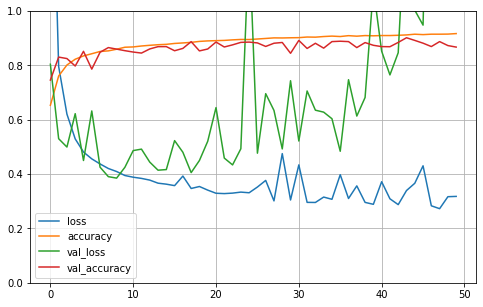

In [21]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 12.5223 - accuracy: 0.8521
Test loss: 12.522250175476074
Test accuracy: 0.8521000146865845


# -------------------------------------------------------------------------------------------

In [23]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    Dense(512, activation="selu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(256, activation="selu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(128, activation="selu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(100, activation="selu", kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/50
430/430 - 7s - loss: 0.8154 - accuracy: 0.7428 - val_loss: 0.4531 - val_accuracy: 0.8418 - 7s/epoch - 17ms/step
Epoch 2/50
430/430 - 7s - loss: 0.5412 - accuracy: 0.8156 - val_loss: 0.4008 - val_accuracy: 0.8584 - 7s/epoch - 16ms/step
Epoch 3/50
430/430 - 6s - loss: 0.4798 - accuracy: 0.8332 - val_loss: 0.3837 - val_accuracy: 0.8628 - 6s/epoch - 14ms/step
Epoch 4/50
430/430 - 6s - loss: 0.4445 - accuracy: 0.8457 - val_loss: 0.3691 - val_accuracy: 0.8670 - 6s/epoch - 15ms/step
Epoch 5/50
430/430 - 7s - loss: 0.4200 - accuracy: 0.8535 - val_loss: 0.3576 - val_accuracy: 0.8708 - 7s/epoch - 16ms/step
Epoch 6/50
430/430 - 6s - loss: 0.4028 - accuracy: 0.8581 - val_loss: 0.3557 - val_accuracy: 0.8732 - 6s/epoch - 15ms/step
Epoch 7/50
430/430 - 7s - loss: 0.3895 - accuracy: 0.8629 - val_loss: 0.3476 - val_accuracy: 0.8756 - 7s/epoch - 16ms/step
Epoch 8/50
430/430 - 7s - loss: 0.3764 - accuracy: 0.8670 - val_loss: 0.3404 - val_accuracy: 0.8768 - 7s/epoch - 17ms/step
Epoch 9/50
430/4

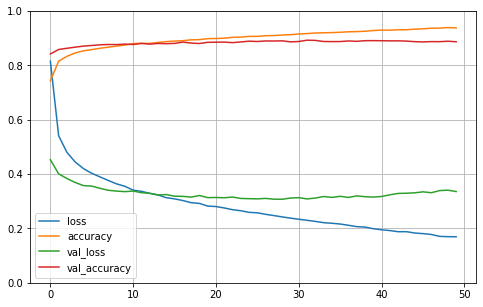

In [24]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8853
Test loss: 0.3600017726421356
Test accuracy: 0.8852999806404114


# -------------------------------------------------------------------------------------------

In [26]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    Dense(512, activation="elu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(256, activation="elu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(128, activation="elu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=30,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/30
430/430 - 8s - loss: 0.7903 - accuracy: 0.7368 - val_loss: 0.4406 - val_accuracy: 0.8444 - 8s/epoch - 18ms/step
Epoch 2/30
430/430 - 6s - loss: 0.5200 - accuracy: 0.8194 - val_loss: 0.3933 - val_accuracy: 0.8616 - 6s/epoch - 15ms/step
Epoch 3/30
430/430 - 7s - loss: 0.4612 - accuracy: 0.8389 - val_loss: 0.3730 - val_accuracy: 0.8668 - 7s/epoch - 17ms/step
Epoch 4/30
430/430 - 7s - loss: 0.4310 - accuracy: 0.8478 - val_loss: 0.3586 - val_accuracy: 0.8746 - 7s/epoch - 16ms/step
Epoch 5/30
430/430 - 7s - loss: 0.4059 - accuracy: 0.8552 - val_loss: 0.3499 - val_accuracy: 0.8748 - 7s/epoch - 16ms/step
Epoch 6/30
430/430 - 6s - loss: 0.3880 - accuracy: 0.8619 - val_loss: 0.3423 - val_accuracy: 0.8758 - 6s/epoch - 15ms/step
Epoch 7/30
430/430 - 7s - loss: 0.3691 - accuracy: 0.8677 - val_loss: 0.3400 - val_accuracy: 0.8802 - 7s/epoch - 16ms/step
Epoch 8/30
430/430 - 7s - loss: 0.3564 - accuracy: 0.8718 - val_loss: 0.3307 - val_accuracy: 0.8810 - 7s/epoch - 15ms/step
Epoch 9/30
430/4

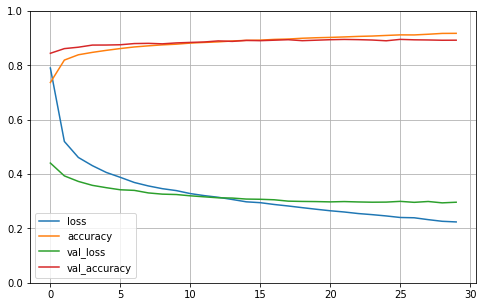

In [27]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3351 - accuracy: 0.8846
Test loss: 0.3350585699081421
Test accuracy: 0.8845999836921692


# -------------------------------------------------------------------------------------------

In [29]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    Dense(512, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(128, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(100, activation="relu", kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=30,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/30
430/430 - 8s - loss: 0.8979 - accuracy: 0.7049 - val_loss: 0.4654 - val_accuracy: 0.8324 - 8s/epoch - 19ms/step
Epoch 2/30
430/430 - 7s - loss: 0.5437 - accuracy: 0.8118 - val_loss: 0.4055 - val_accuracy: 0.8534 - 7s/epoch - 16ms/step
Epoch 3/30
430/430 - 7s - loss: 0.4690 - accuracy: 0.8369 - val_loss: 0.3748 - val_accuracy: 0.8624 - 7s/epoch - 16ms/step
Epoch 4/30
430/430 - 6s - loss: 0.4301 - accuracy: 0.8494 - val_loss: 0.3604 - val_accuracy: 0.8650 - 6s/epoch - 14ms/step
Epoch 5/30
430/430 - 6s - loss: 0.3994 - accuracy: 0.8587 - val_loss: 0.3466 - val_accuracy: 0.8686 - 6s/epoch - 13ms/step
Epoch 6/30
430/430 - 6s - loss: 0.3786 - accuracy: 0.8665 - val_loss: 0.3353 - val_accuracy: 0.8750 - 6s/epoch - 15ms/step
Epoch 7/30
430/430 - 6s - loss: 0.3610 - accuracy: 0.8717 - val_loss: 0.3319 - val_accuracy: 0.8772 - 6s/epoch - 15ms/step
Epoch 8/30
430/430 - 6s - loss: 0.3472 - accuracy: 0.8763 - val_loss: 0.3256 - val_accuracy: 0.8798 - 6s/epoch - 14ms/step
Epoch 9/30
430/4

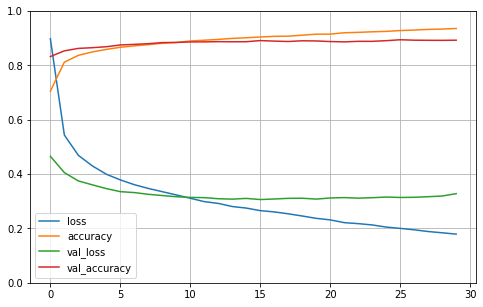

In [30]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8878
Test loss: 0.3570820391178131
Test accuracy: 0.8877999782562256


# -------------------------------------------------------------------------------------------

In [32]:
# building a pyramid scheme neural network
model = Sequential([
    Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    Dense(512, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dense(128, activation="relu", kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation="softmax", kernel_initializer='he_normal')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=30,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/30
430/430 - 8s - loss: 0.8299 - accuracy: 0.7304 - val_loss: 0.4520 - val_accuracy: 0.8420 - 8s/epoch - 19ms/step
Epoch 2/30
430/430 - 7s - loss: 0.5252 - accuracy: 0.8170 - val_loss: 0.3972 - val_accuracy: 0.8608 - 7s/epoch - 16ms/step
Epoch 3/30
430/430 - 6s - loss: 0.4612 - accuracy: 0.8370 - val_loss: 0.3700 - val_accuracy: 0.8684 - 6s/epoch - 15ms/step
Epoch 4/30
430/430 - 6s - loss: 0.4202 - accuracy: 0.8505 - val_loss: 0.3568 - val_accuracy: 0.8730 - 6s/epoch - 14ms/step
Epoch 5/30
430/430 - 6s - loss: 0.3980 - accuracy: 0.8572 - val_loss: 0.3439 - val_accuracy: 0.8788 - 6s/epoch - 14ms/step
Epoch 6/30
430/430 - 10s - loss: 0.3796 - accuracy: 0.8630 - val_loss: 0.3414 - val_accuracy: 0.8768 - 10s/epoch - 23ms/step
Epoch 7/30
430/430 - 7s - loss: 0.3628 - accuracy: 0.8709 - val_loss: 0.3308 - val_accuracy: 0.8804 - 7s/epoch - 16ms/step
Epoch 8/30
430/430 - 7s - loss: 0.3498 - accuracy: 0.8736 - val_loss: 0.3249 - val_accuracy: 0.8844 - 7s/epoch - 17ms/step
Epoch 9/30
430

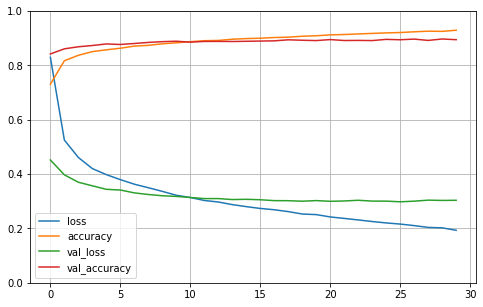

In [33]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8848
Test loss: 0.3415193259716034
Test accuracy: 0.8848000168800354


# -------------------------------------------------------------------------------------------

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])
history_6 = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5525 - accuracy: 0.7959 - val_loss: 0.3955 - val_accuracy: 0.8596
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3945 - accuracy: 0.8539 - val_loss: 0.3805 - val_accuracy: 0.8628
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3502 - accuracy: 0.8705 - val_loss: 0.3426 - val_accuracy: 0.8754
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3249 - accuracy: 0.8784 - val_loss: 0.3271 - val_accuracy: 0.8774
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.8847 - val_loss: 0.3257 - val_accuracy: 0.8800
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.8904 - val_loss: 0.3069 - val_accuracy: 0.8892
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2774 - accuracy: 0.8954 - val_loss: 0.3385 - val_accuracy:

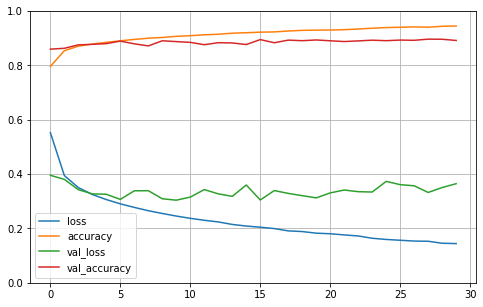

In [37]:
# Learning curve
pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8856
Test loss: 0.3888002932071686
Test accuracy: 0.8855999708175659


# -------------------------------------------------------------------------------------------

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu"),
    Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/50
430/430 - 10s - loss: 0.6868 - accuracy: 0.7631 - val_loss: 0.4177 - val_accuracy: 0.8530 - 10s/epoch - 23ms/step
Epoch 2/50
430/430 - 8s - loss: 0.4479 - accuracy: 0.8400 - val_loss: 0.3642 - val_accuracy: 0.8702 - 8s/epoch - 19ms/step
Epoch 3/50
430/430 - 9s - loss: 0.3962 - accuracy: 0.8589 - val_loss: 0.3432 - val_accuracy: 0.8750 - 9s/epoch - 22ms/step
Epoch 4/50
430/430 - 8s - loss: 0.3655 - accuracy: 0.8701 - val_loss: 0.3279 - val_accuracy: 0.8844 - 8s/epoch - 19ms/step
Epoch 5/50
430/430 - 7s - loss: 0.3410 - accuracy: 0.8771 - val_loss: 0.3181 - val_accuracy: 0.8840 - 7s/epoch - 17ms/step
Epoch 6/50
430/430 - 7s - loss: 0.3213 - accuracy: 0.8836 - val_loss: 0.3096 - val_accuracy: 0.8870 - 7s/epoch - 17ms/step
Epoch 7/50
430/430 - 8s - loss: 0.3053 - accuracy: 0.8892 - val_loss: 0.3048 - val_accuracy: 0.8898 - 8s/epoch - 18ms/step
Epoch 8/50
430/430 - 8s - loss: 0.2932 - accuracy: 0.8942 - val_loss: 0.2981 - val_accuracy: 0.8924 - 8s/epoch - 19ms/step
Epoch 9/50
430

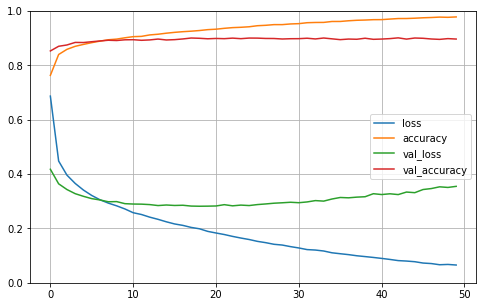

In [40]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8888
Test loss: 0.4061390459537506
Test accuracy: 0.8888000249862671


# -------------------------------------------------------------------------------------------

### Highest accuracy

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/50
430/430 - 10s - loss: 16.2511 - accuracy: 0.6156 - val_loss: 14.4443 - val_accuracy: 0.7986 - 10s/epoch - 23ms/step
Epoch 2/50
430/430 - 8s - loss: 13.4337 - accuracy: 0.7551 - val_loss: 12.1563 - val_accuracy: 0.8288 - 8s/epoch - 19ms/step
Epoch 3/50
430/430 - 8s - loss: 11.3273 - accuracy: 0.7880 - val_loss: 10.2700 - val_accuracy: 0.8456 - 8s/epoch - 19ms/step
Epoch 4/50
430/430 - 9s - loss: 9.5864 - accuracy: 0.8040 - val_loss: 8.6963 - val_accuracy: 0.8514 - 9s/epoch - 21ms/step
Epoch 5/50
430/430 - 10s - loss: 8.1240 - accuracy: 0.8194 - val_loss: 7.3688 - val_accuracy: 0.8596 - 10s/epoch - 24ms/step
Epoch 6/50
430/430 - 13s - loss: 6.8940 - accuracy: 0.8281 - val_loss: 6.2580 - val_accuracy: 0.8616 - 13s/epoch - 31ms/step
Epoch 7/50
430/430 - 9s - loss: 5.8606 - accuracy: 0.8379 - val_loss: 5.3187 - val_accuracy: 0.8682 - 9s/epoch - 21ms/step
Epoch 8/50
430/430 - 9s - loss: 4.9958 - accuracy: 0.8435 - val_loss: 4.5320 - val_accuracy: 0.8706 - 9s/epoch - 20ms/step
Epoc

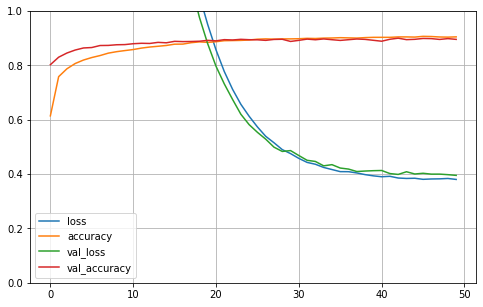

In [50]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.4239 - accuracy: 0.8896
Test loss: 0.4238976538181305
Test accuracy: 0.8895999789237976


# -------------------------------------------------------------------------------------------

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
history = model.fit(x_train, y_train,batch_size=128,epochs=50,verbose=2,validation_data=(x_valid, y_valid))

2022-02-13 10:23:03.730306: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
430/430 - 23s - loss: 182.2502 - accuracy: 0.6367 - val_loss: 51.4247 - val_accuracy: 0.6224 - 23s/epoch - 53ms/step
Epoch 2/100
430/430 - 20s - loss: 12.4050 - accuracy: 0.7522 - val_loss: 2.6563 - val_accuracy: 0.7370 - 20s/epoch - 45ms/step
Epoch 3/100
430/430 - 16s - loss: 2.1441 - accuracy: 0.7013 - val_loss: 1.9140 - val_accuracy: 0.7316 - 16s/epoch - 38ms/step
Epoch 4/100
430/430 - 13s - loss: 1.9759 - accuracy: 0.7033 - val_loss: 1.8106 - val_accuracy: 0.7240 - 13s/epoch - 31ms/step
Epoch 5/100
430/430 - 12s - loss: 1.9020 - accuracy: 0.7065 - val_loss: 1.6921 - val_accuracy: 0.7706 - 12s/epoch - 28ms/step
Epoch 6/100
430/430 - 12s - loss: 1.8622 - accuracy: 0.7060 - val_loss: 1.6457 - val_accuracy: 0.7654 - 12s/epoch - 28ms/step
Epoch 7/100
430/430 - 12s - loss: 1.8335 - accuracy: 0.7062 - val_loss: 1.6389 - val_accuracy: 0.7830 - 12s/epoch - 27ms/step
Epoch 8/100
430/430 - 10s - loss: 1.8133 - accuracy: 0.7135 - val_loss: 1.6225 - val_accuracy: 0.7850 - 10s/epoch 

Epoch 66/100
430/430 - 9s - loss: 1.6228 - accuracy: 0.7297 - val_loss: 1.3926 - val_accuracy: 0.8070 - 9s/epoch - 22ms/step
Epoch 67/100
430/430 - 10s - loss: 1.6367 - accuracy: 0.7271 - val_loss: 1.4175 - val_accuracy: 0.7964 - 10s/epoch - 22ms/step
Epoch 68/100
430/430 - 10s - loss: 1.6229 - accuracy: 0.7304 - val_loss: 1.4493 - val_accuracy: 0.7788 - 10s/epoch - 24ms/step
Epoch 69/100
430/430 - 9s - loss: 1.6266 - accuracy: 0.7248 - val_loss: 1.3862 - val_accuracy: 0.7968 - 9s/epoch - 22ms/step
Epoch 70/100
430/430 - 10s - loss: 1.6175 - accuracy: 0.7255 - val_loss: 1.4228 - val_accuracy: 0.7806 - 10s/epoch - 22ms/step
Epoch 71/100
430/430 - 10s - loss: 1.6159 - accuracy: 0.7245 - val_loss: 1.4366 - val_accuracy: 0.7690 - 10s/epoch - 22ms/step
Epoch 72/100
430/430 - 9s - loss: 1.6227 - accuracy: 0.7285 - val_loss: 1.4132 - val_accuracy: 0.7918 - 9s/epoch - 22ms/step
Epoch 73/100
430/430 - 9s - loss: 1.6093 - accuracy: 0.7264 - val_loss: 1.3968 - val_accuracy: 0.7878 - 9s/epoch - 22

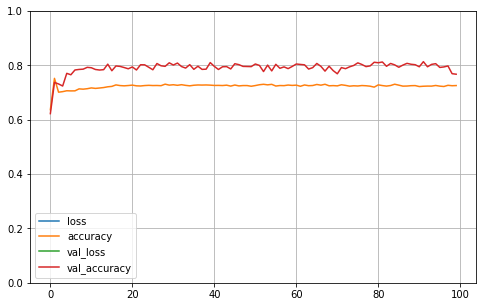

In [9]:
# Learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.5493 - accuracy: 0.7546
Test loss: 1.5493035316467285
Test accuracy: 0.7545999884605408


### Grid Search - Did not complete it because it took too much time and was affecting my device's hardware so had to terminate

In [15]:
#def build_model(n_hidden=4, nu_neuron=512, learning_rate=3e-3, input_shape=[28, 28])
def build_model(optimizer, learning_rate, activation, dropout_rate,
                initializer,num_unit):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    
    model.add(keras.layers.BatchNormalization()),
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation))
    
    model.add(keras.layers.BatchNormalization()),
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation))
    
    model.add(keras.layers.BatchNormalization()),
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation))
    
    model.add(keras.layers.BatchNormalization()),
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

In [16]:
batch_size = [32, 64, 128, 256]

epochs = [15, 30, 50]

initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform']

learning_rate = [0.1, 0.001, 0.02]

dropout_rate = [0.3, 0.2, 0.4, 0.5]

num_unit = [512, 256, 128, 64]

activation = ['relu', 'tanh', 'sigmoid', 'selu', 'elu']

optimizer = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, 
             keras.optimizers.Adadelta, keras.optimizers.Adam, keras.optimizers.Adamax, keras.optimizers.Nadam]

In [17]:
# Creat the wrapper and pass params to GridSearchCV 
# parameters is a dict with all values

parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  learning_rate = learning_rate,
                  activation = activation,
                  optimizer = optimizer)

model = KerasClassifier(build_fn=build_model, verbose=0)

models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

/var/folders/kr/gtcybxvj34v71bp1q0gc41ww0000gn/T/ipykernel_26007/721556897.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=build_model, verbose=0)


In [18]:
# Takes large amount of time!!
best_model = models.fit(x_train, y_train)
print('Best model :')
pp.pprint(best_model.best_params_)

KeyboardInterrupt: 

In [ ]:
# Learning curve
pd.DataFrame(best_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
score = best_model.evaluate(x_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])